<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Origin_MSSC_N500_filter_Potential_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

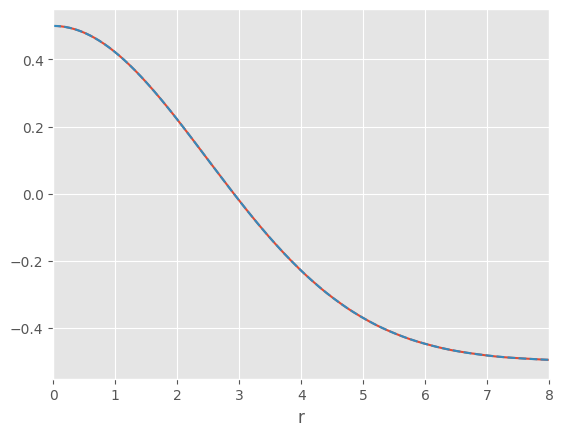

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')


N = 100                                                   # Truncation ordem

L0 = 2                                             # Map parameter

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)

colr = col[1:N+2]                                                         # physical domain (Verificado)

r1 = L0 * colr/(np.sqrt(1-colr**2))
r = np.flip(r1)                                           # physical domain (Verificado)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse

Phi_c = 1/2

Phi_vac = -1/2

R0 = 3.5  # 0.05 -> disperse ;  # 0.  -> colapse   A0 substitution

Phi_init = (Phi_c - Phi_vac)*np.exp(-r**2/R0**2) + Phi_vac          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = (Phi_c - Phi_vac)*np.exp(-rplot**2/R0**2) + Phi_vac

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


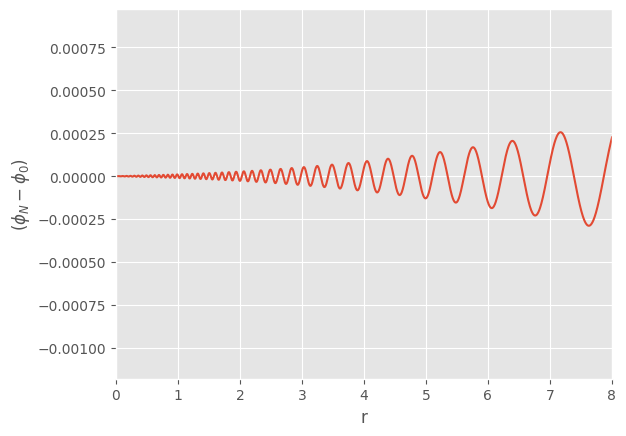

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$(\phi_N - \phi_0)$")
plt.show()

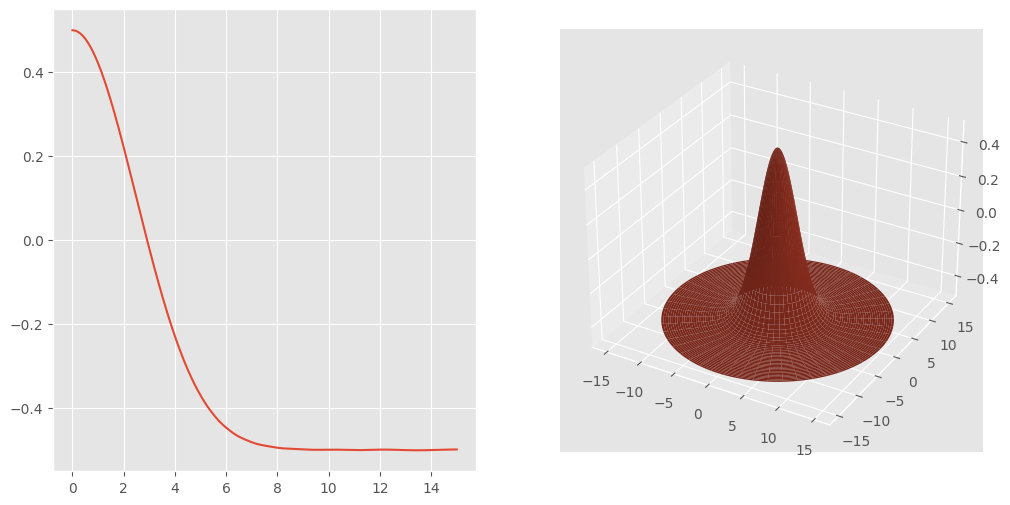

In [3]:

# Plot 3D from Phi initial:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = Phiplot
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn)
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

def V(Phi):
  return 1/4*(Phi**2 - Phi_vac**2)**2

def dV(Phi):
  return Phi**3 - Phi_vac**2*Phi


coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-18
#cnew = 0
#err = abs(c0 - cnew)

n = 0
nf = 500

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*rPhi[0]**2 + np.exp(4*Chi[0])*V(Phi)[0]
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + np.exp(4*Chi[1:N+1])*V(Phi)[1:N+1]
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin + 4*np.exp(4*Chi[0])*rpsi[:,0]*V(Phi)[0]
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*np.exp(4*Chi[1:N+1])*rpsi[:,1:N+1]*V(Phi)[1:N+1]
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  if  max(err) <= tol:
    print('n=', n, 'Erro_max=', max(err), 'c0=', c0, sep = '\n')

    break
  else:
    n = n + 1


n=
40
Erro_max=
8.673617379884035e-19
c0=
[ 1.44907074e-01  2.82654065e-02  4.61735594e-03 -7.28299604e-04
 -7.45759638e-04  1.02634788e-04  6.00133204e-04  6.96836229e-04
  5.99003068e-04  4.65171643e-04  3.62886518e-04  3.01838016e-04
  2.69533151e-04  2.51426069e-04  2.37961180e-04  2.24831089e-04
  2.11049227e-04  1.97071081e-04  1.83632938e-04  1.71251641e-04
  1.60128585e-04  1.50228324e-04  1.41393823e-04  1.33436230e-04
  1.26186039e-04  1.19511917e-04  1.13320802e-04  1.07549147e-04
  1.02153091e-04  9.70999688e-05  9.23630251e-05  8.79181366e-05
  8.37427312e-05  7.98152475e-05  7.61155036e-05  7.26247026e-05
  6.93258335e-05  6.62034858e-05  6.32440148e-05  6.04351687e-05
  5.77661411e-05  5.52271550e-05  5.28095243e-05  5.05052764e-05
  4.83072643e-05  4.62088404e-05  4.42040133e-05  4.22871574e-05
  4.04531959e-05  3.86973300e-05  3.70152342e-05  3.54027948e-05
  3.38563126e-05  3.23722457e-05  3.09474172e-05  2.95787621e-05
  2.82635384e-05  2.69990785e-05  2.57830036e-05

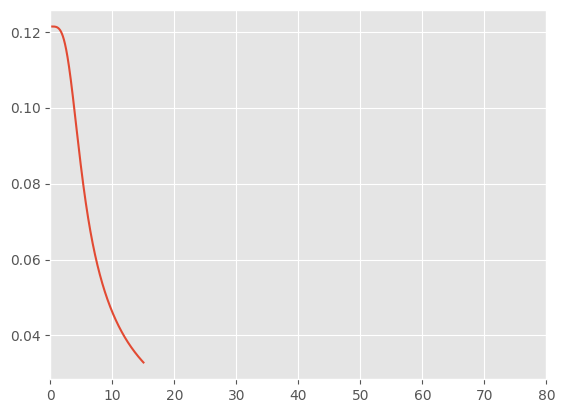

In [5]:

Chiplot = np.dot(c0, psiplot)


plt.plot(rplot,Chiplot)
plt.xlim(0,80)
plt.show()


In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0:

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [7]:
np.shape(SB2)

(100, 101)

In [8]:
np.shape(SB1)

(100, 101)

In [9]:
c0

array([ 1.44907074e-01,  2.82654065e-02,  4.61735594e-03, -7.28299604e-04,
       -7.45759638e-04,  1.02634788e-04,  6.00133204e-04,  6.96836229e-04,
        5.99003068e-04,  4.65171643e-04,  3.62886518e-04,  3.01838016e-04,
        2.69533151e-04,  2.51426069e-04,  2.37961180e-04,  2.24831089e-04,
        2.11049227e-04,  1.97071081e-04,  1.83632938e-04,  1.71251641e-04,
        1.60128585e-04,  1.50228324e-04,  1.41393823e-04,  1.33436230e-04,
        1.26186039e-04,  1.19511917e-04,  1.13320802e-04,  1.07549147e-04,
        1.02153091e-04,  9.70999688e-05,  9.23630251e-05,  8.79181366e-05,
        8.37427312e-05,  7.98152475e-05,  7.61155036e-05,  7.26247026e-05,
        6.93258335e-05,  6.62034858e-05,  6.32440148e-05,  6.04351687e-05,
        5.77661411e-05,  5.52271550e-05,  5.28095243e-05,  5.05052764e-05,
        4.83072643e-05,  4.62088404e-05,  4.42040133e-05,  4.22871574e-05,
        4.04531959e-05,  3.86973300e-05,  3.70152342e-05,  3.54027948e-05,
        3.38563126e-05,  

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [ ]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 100

It = int(tf/h)

#t1 = np.linspace(0, tf, It)

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)


M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)
  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1]  - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  t = t + h
#  print(t)
#  if t > 9:
#    h=0.0001


  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))

  print('t =',t,'rPi =', max(rPi), sep = '\n')


#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()

t1 = np.linspace(0, tf, len(Alpha_origin))

t =
0.0002
rPi =
5.3094483244905954e-05
t =
0.0004
rPi =
8.297270912999639e-05
t =
0.0006000000000000001
rPi =
0.00011284874447314196
t =
0.0008
rPi =
0.00014272035266936554
t =
0.001
rPi =
0.00017259260907317964
t =
0.0012000000000000001
rPi =
0.00020249026653451662
t =
0.0014000000000000002
rPi =
0.0002324170977364918
t =
0.0016000000000000003
rPi =
0.00026234695327787385
t =
0.0018000000000000004
rPi =
0.0002922794415226636
t =
0.0020000000000000005
rPi =
0.0003222138850672941
t =
0.0022000000000000006
rPi =
0.00035214955575517013
t =
0.0024000000000000007
rPi =
0.000382085786656944
t =
0.0026000000000000007
rPi =
0.0004120220168314135
t =
0.002800000000000001
rPi =
0.0004419578014628066
t =
0.003000000000000001
rPi =
0.0004718928053881524
t =
0.003200000000000001
rPi =
0.0005018267896426926
t =
0.003400000000000001
rPi =
0.0005317595959922068
t =
0.003600000000000001
rPi =
0.0005616911318880914
t =
0.0038000000000000013
rPi =
0.0005916213569236734
t =
0.004000000000000001
rPi =
0.0

In [ ]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$R_0$ = {:}".format(R0))
plt.title("Alpha na origem para L0 = 2, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

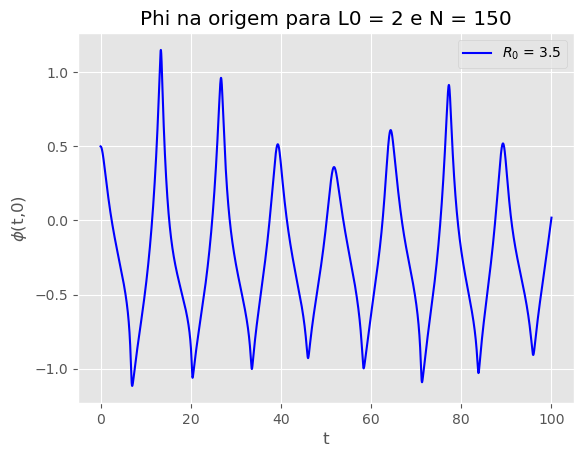

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = "$R_0$ = {:}".format(R0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
#plt.xlim(7.2,8.2)
plt.legend()

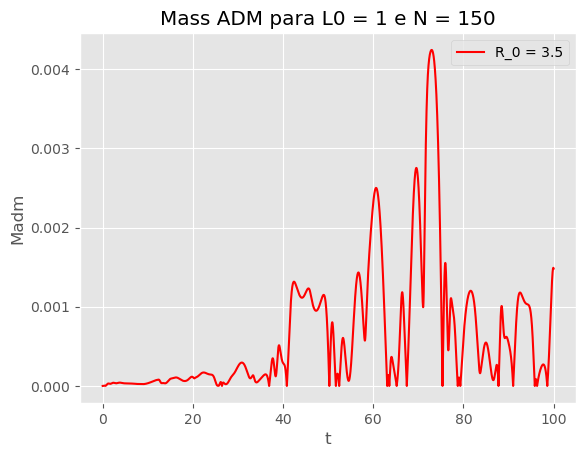

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label ="R_0 = {:}".format(R0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")
#plt.xlim(7.2,8.2)

plt.legend()

In [ ]:
len(rplot)

3000

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '5000.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpwdpl9w_3/temp.m4v']' returned non-zero exit status 255.

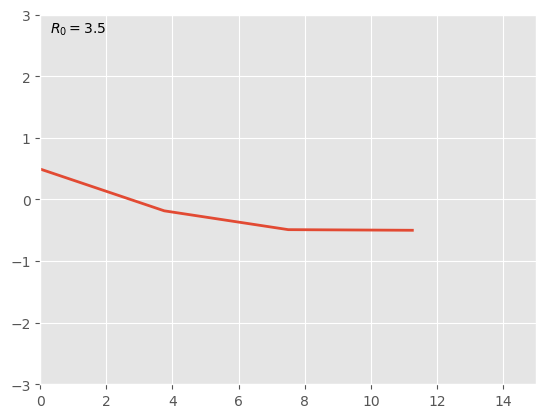

In [ ]:
# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot
num_points_to_show = len(rplot)//4  # Mostrar 1/4 dos pontos para acelerar a animação

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  x_subset = x[::num_points_to_show] # Selecionar um subconjunto de pontos
  y_subset = y[::num_points_to_show]
  line.set_data(x_subset, y_subset)
  initA0_text.set_text("$R_0 = {:}$".format(R0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames= It, interval=0.2, blit=True)

HTML(anim.to_html5_video())